# Pitchfork Music Reviews Data Analysis

By: Chen Chen and Pouyan Chamanian



# Importing Required Libraries

In [55]:
import os
import pandas as pd
import sqlite3 as sql
from collections import Counter
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

sb.set_style('whitegrid')
%matplotlib inline
rcParams['figure.figsize'] = 20 ,15
rcParams.update({'font.size': 20})

# Connecting to sqlite, reading data, assigning dataframes

In [3]:
conn = sql.connect('Downloads/database.sqlite')
reviews = pd.read_sql_query("SELECT * FROM reviews", conn)
genres = pd.read_sql_query("SELECT * FROM genres", conn)

In [5]:
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [6]:
genres.head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


## Creating Artist Score Filter function

A function which filters reviews dataframe based on score and artist name

In [21]:
def artistScoreFilter(score, artist):
    reviews_filter = reviews.drop(['reviewid', 'url', 'pub_weekday','pub_month','pub_day','pub_year'], axis = 1)
    results = reviews_filter.loc[(reviews_filter.score >= int(score))& (reviews_filter.artist == artist.lower())]
    return results

#Example output:
artistScoreFilter(5, "Drake")

,title,artist,score,best_new_music,author,author_type,pub_date
853,views,drake,6.8,0,ryan dombal,senior editor,2016-05-02
2282,if you're reading this it's too late,drake,8.3,1,craig jenkins,contributor,2015-02-17
3859,nothing was the same,drake,8.6,1,jayson greene,senior editor,2013-09-23
6049,take care,drake,8.6,1,ryan dombal,senior editor,2011-11-14
7719,thank me later,drake,8.4,0,ryan dombal,senior editor,2010-06-15
8853,so far gone,drake,7.4,0,tom breihan,contributor,2009-06-29


## Creating Multiple Score function

Function will show artists in descending order of mean score, filtered by number of albums.
Can change number of top artists displayed.

In [23]:
def multipleScore(releases, displayAmt):
    query = "SELECT reviewid, artist, AVG(score) as avgscore, COUNT(artist) as releases FROM reviews GROUP BY artist HAVING COUNT(artist) > {} ORDER BY AVG(score) DESC LIMIT {}".format(releases, displayAmt)
    multartists = pd.read_sql_query(query, conn)
    return multartists

#Example output:
multipleScore(5, 10)


,reviewid,artist,avgscore,releases
0,21317,the velvet underground,9.457143,7
1,18752,the beatles,8.890476,21
2,21918,miles davis,8.730769,13
3,20539,blur,8.585714,7
4,21039,deerhunter,8.562500,8
5,15961,tom waits,8.542857,7
6,21197,beach house,8.533333,6
7,16815,mission of burma,8.500000,6
8,21542,kanye west,8.425000,8
9,22248,scott walker,8.357143,7


## Creating Top Artists by Genre function

Function which displays top aritsts based on mean score, filtered by genre and number of albums.
Can changed number of top artists displayed.

In [34]:
def topArtistsinGenre(genre, releases, displayAmt):
    query = "SELECT artist, AVG(score) as avgscore, COUNT(artist) as releases, genre FROM reviews LEFT JOIN genres USING(reviewid) WHERE genre == \'{}\' GROUP BY artist HAVING COUNT(artist) > {} ORDER BY AVG(score) DESC LIMIT {}".format(genre,releases, displayAmt)
    withGenre = pd.read_sql_query(query, conn)
    return withGenre

#Example output:
topArtistsinGenre('jazz', 4, 10)


,artist,avgscore,releases,genre
0,miles davis,8.730769,13,jazz
1,john zorn,7.914286,7,jazz
2,matthew shipp,7.912500,8,jazz
3,amon tobin,7.742857,7,jazz
4,shining,7.620000,5,jazz
5,spring heel jack,7.340000,5,jazz
6,zs,7.314286,7,jazz
7,daedelus,6.600000,9,jazz
8,thievery corporation,5.760000,5,jazz
9,unkle,5.140000,5,jazz


### Creating function to visualize artist album scores over time, takes artist name as input.

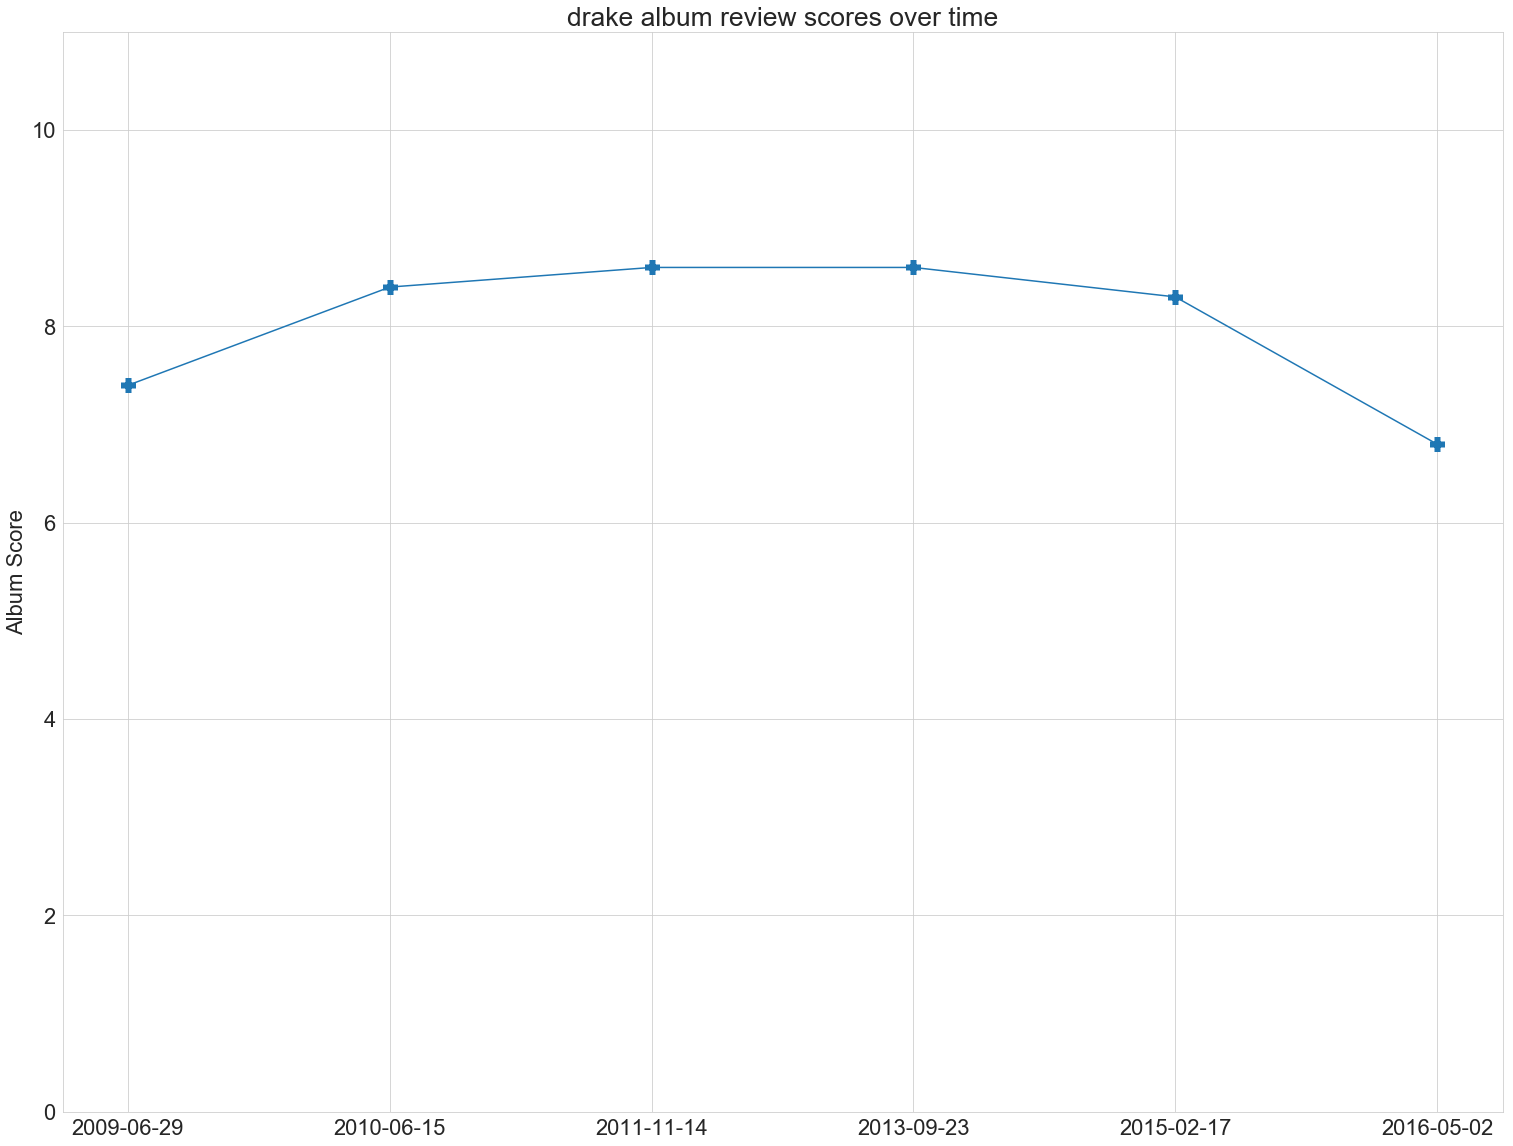

In [47]:
def ArtistScoreTimeVis(name):
    artist = reviews.loc[reviews['artist']==name.lower()]
    x = artist['pub_date'].iloc[::-1]
    y = artist['score'].iloc[::-1]
 
    fig = plt.figure()
    ax = fig.add_axes([.1,.1,1,1])
    ax.set_ylim([0,11])
    ax.set_ylabel('Album Score')
    ax.set_title(name + " album review scores over time")
    
    ax.plot(x,y,marker = '+', mew = 15)
    plt.show()

#Example output:
ArtistScoreTimeVis('drake')

## Creating Visualization for Top Artist Averages and Genres

Function will take minimum number of artist releases and display amount, and will return visualization of genre distribution for top artists.

    reviewid                  artist  avgscore  releases         genre
0      21317  the velvet underground  9.457143         7          rock
1      21844  prince, the revolution  9.300000         6       pop/r&b
2      12426              max tundra  9.000000         6    electronic
3      20747                pavement  9.000000         5          rock
4      18752             the beatles  8.890476        21          rock
5      20148          sleater-kinney  8.860000         5          rock
6      22255          caetano veloso  8.840000         5        global
7      21097           joanna newsom  8.760000         5  folk/country
8      21918             miles davis  8.730769        13          jazz
9      14755  dexys midnight runners  8.633333         6    electronic
10     20539                    blur  8.585714         7          rock
11     21039              deerhunter  8.562500         8          rock
12     15961               tom waits  8.542857         7          rock
13    

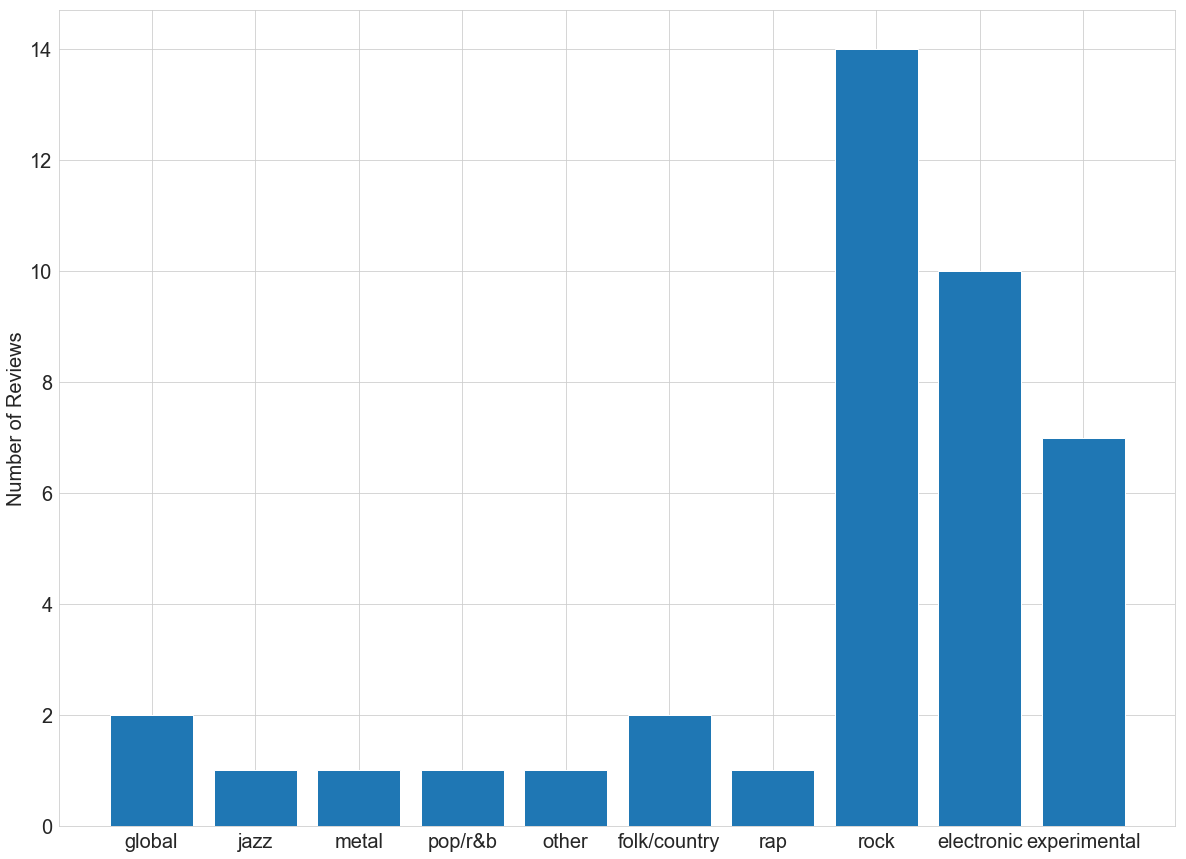

In [56]:
def AvgArtistScoreVis(releases, top_number):
    query = "SELECT reviewid, artist, AVG(score) as avgscore, COUNT(artist) as releases, genre FROM reviews LEFT JOIN genres USING(reviewid) GROUP BY artist HAVING COUNT(artist) > {} ORDER BY AVG(score) DESC LIMIT %s".format(releases) % top_number
    withGenre = pd.read_sql_query(query, conn)
    withGenre_withOther = withGenre.fillna({"genre": "other"})
    print withGenre_withOther
    genre_count = Counter(withGenre_withOther['genre'])
    z = genre_count.values()
    artist_names = genre_count.keys()
    plt.bar(artist_names, z)
    plt.ylabel("Number of Reviews")
    plt.show()
    

#Example output:
AvgArtistScoreVis(4, 40)

# Looking at Reviewer Data

## Creating Average Reviewer Score function

Function which takes minimum reviews written by reviewer and display amount, and returns list of top avg scores by reviewers that meet minimum review number.

In [65]:
def avgReviewerScore(min_reviews, displayAmt):
    query = "SELECT reviewid, author, AVG(score) as avgscore, COUNT(author) as articles FROM reviews GROUP BY author HAVING COUNT(author)>= {} ORDER BY AVG(score) DESC LIMIT {}".format(min_reviews, displayAmt) 
    avgreviewer = pd.read_sql_query(query, conn)
    return avgreviewer

#Example output:
avgReviewerScore(50, 10)



,reviewid,author,avgscore,articles
0,22706,seth colter walls,7.724138,58
1,15413,scott plagenhoef,7.669106,123
2,22674,mark richardson,7.578571,476
3,22666,philip sherburne,7.565550,209
4,15221,dominique leone,7.495604,273
5,21676,brandon stosuy,7.493750,288
6,22715,marc masters,7.468910,312
7,22694,andy beta,7.468800,250
8,22326,grayson haver currin,7.391176,136
9,22157,david drake,7.389394,66


### Creating Dataframe showing authors and their mean scores and number of articles, grouped by genre.

In [66]:
def reviewerGenres():
    query = "SELECT reviewid, author, AVG(score) as avgscore, genre,COUNT(author) as articles FROM (SELECT reviewid, author, score, genre FROM reviews LEFT JOIN genres USING (reviewid) ORDER BY author) GROUP BY author, genre"
    revGenres = pd.read_sql_query( query, conn)
    return revGenres

reviewerGenres()

,reviewid,author,avgscore,genre,articles
0,21203,aaron leitko,7.242857,None,14
1,21950,aaron leitko,7.261538,electronic,13
2,21753,aaron leitko,7.320690,experimental,29
3,21622,aaron leitko,7.100000,folk/country,3
4,19984,aaron leitko,8.550000,global,2
5,20652,aaron leitko,7.600000,jazz,5
6,16908,aaron leitko,6.200000,metal,6
7,14536,aaron leitko,7.300000,pop/r&b,1
8,11134,aaron leitko,8.100000,rap,1
9,20949,aaron leitko,7.035185,rock,54


## Creating Genre Distribution for Top Authors

Function takes the display amount and returns a visulization of genre distribution for each top author.

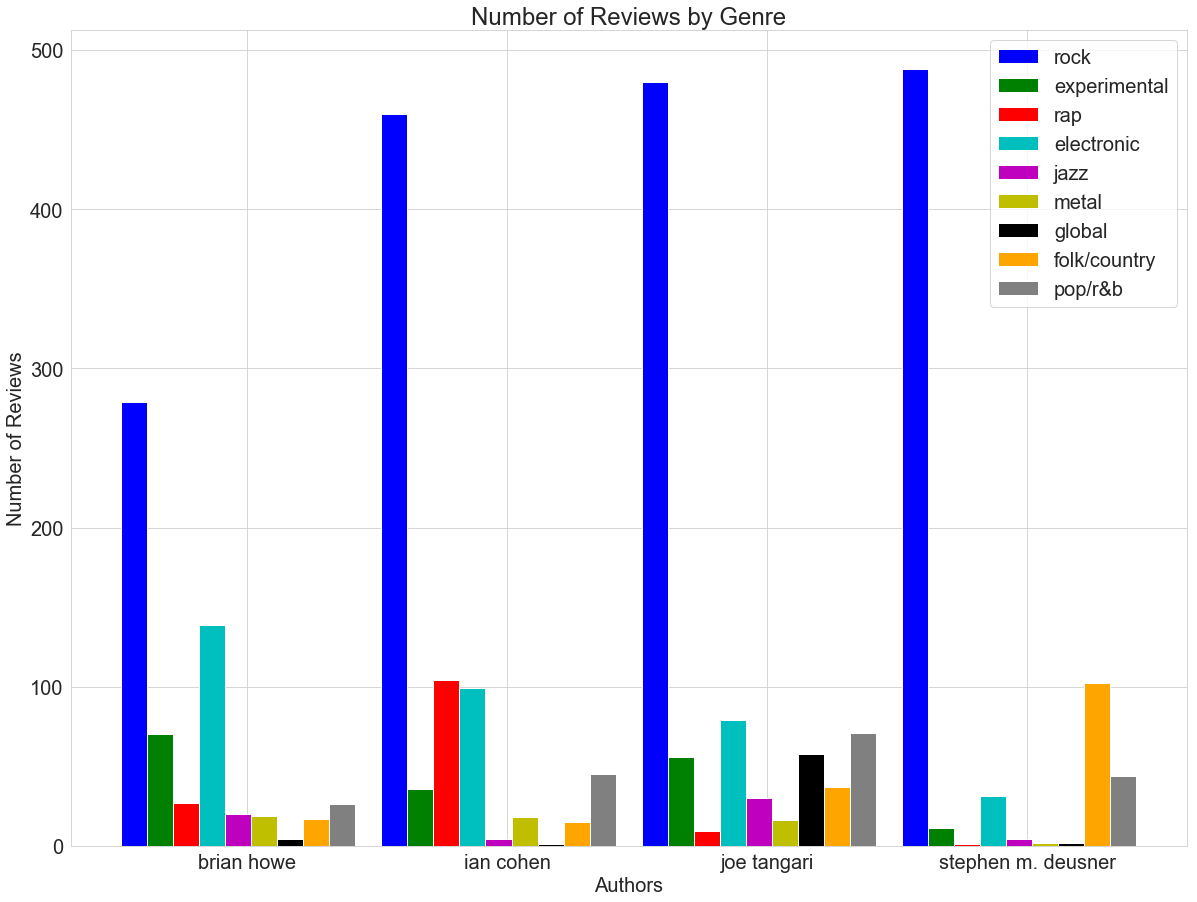

In [71]:
def TopAuthorsGenreDist(num_authors):
    query = "SELECT reviewid, author, AVG(score) as avgscore, genre,COUNT(author) as articles FROM (SELECT reviewid, author, score, genre FROM reviews LEFT JOIN genres USING (reviewid) ORDER BY author) GROUP BY author, genre"
    revGenres = pd.read_sql_query(query, conn)
    query1 = "SELECT reviewid, author, title, artist, score, COUNT(author) as articles, pub_date, genre FROM reviews LEFT JOIN genres USING(reviewid) GROUP BY author ORDER BY COUNT(author) DESC LIMIT %s" % num_authors
    authors_byArticles = pd.read_sql_query(query1,conn)

    top_authors = authors_byArticles['author'].tolist()

    revGenres = revGenres.sort_values(by = ['articles'], ascending = [False])

    authors_genre_pivot = revGenres.pivot(index = 'genre',columns = 'author', values = 'articles')
    for author in authors_genre_pivot:
        if author not in top_authors:
            authors_genre_pivot = authors_genre_pivot.drop([author], axis=1)


    x = list(authors_genre_pivot.columns)
    y = list(authors_genre_pivot.loc['rock'])
    z = list(authors_genre_pivot.loc['experimental'])
    k = list(authors_genre_pivot.loc['rap'])
    l = list(authors_genre_pivot.loc['electronic'])
    m = list(authors_genre_pivot.loc['jazz'])
    n = list(authors_genre_pivot.loc['metal'])
    o = list(authors_genre_pivot.loc['global'])
    p = list(authors_genre_pivot.loc['folk/country'])
    q = list(authors_genre_pivot.loc['pop/r&b'])


    N = len(x)
    ind = np.arange(N)
    width = 0.1

    ax = plt.subplot(111)
    bar1 = ax.bar(ind - width*4, y, width, color='b')
    bar2 = ax.bar(ind - width*3, z, width, color='g', align='center')
    bar3 = ax.bar(ind - width*2, k, width, color='r', align='center')
    bar4 = ax.bar(ind - width, l, width, color='c', align='center')
    bar5 = ax.bar(ind, m, width, color='m', align='center')
    bar6 = ax.bar(ind + width, n, width, color='y', align='center')
    bar7 = ax.bar(ind + width*2, o, width, color='k', align='center')
    bar8 = ax.bar(ind + width*3, p, width, color='orange', align='center')
    bar9 = ax.bar(ind + width*4, q, width, color='gray', align='center')


    ax.set_ylabel('Number of Reviews')
    ax.set_xlabel('Authors')
    ax.set_title('Number of Reviews by Genre')
    ax.set_xticks(ind + width / 3)
    ax.set_xticklabels((x))

    ax.legend((bar1[0], bar2[0], bar3[0], bar4[0], bar5[0], bar6[0], bar7[0], bar8[0], bar9[0]), ('rock', 'experimental', 'rap', 'electronic', 'jazz','metal','global','folk/country','pop/r&b'))

    plt.show()

#Example output:
TopAuthorsGenreDist(4)